# Heart Failure Classification Project

## Import , Understand & Preprocess

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Columns
_____
* Age : age of the patient `years`
* Sex : sex of the patient `Male` , `Female`
* ChestPainType: chest pain type :
            `TA`: Typical Angina, `ATA`: Atypical Angina, `NAP`: Non-Anginal Pain, `ASY` : Asymptomatic
* RestingBP: resting blood pressure `mm Hg`
* Cholesterol : serum cholesterol `mm/dl`
* FastingBS : fasting blood sugar `1: if FastingBS > 120 mg/dl` , `0 : otherwise`
* RestingECG: resting electrocardiogram results :
            `Normal` , `ST` : having ST-T wave abnormality , `LVH`: showing probable or definite left ventricular hypertrophy by Estes' criteria
* MaxHR: maximum heart rate achieved `Numeric value between 60 and 202`
* ExerciseAngina : exercise-induced angina `Yes` , `No`
* Oldpeak : `ST` Numeric value measured in depression
* ST_Slope : the slope of the peak exercise ST segment `Up` , `Flat` , `Down`
* HeartDisease : `heart disease` , `Normal`

In [2]:
df=pd.read_csv(r"/kaggle/input/heart-failure-prediction/heart.csv")
df.FastingBS=df.FastingBS.astype('object')
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Understand

In [3]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [6]:
df.duplicated().value_counts()

False    918
dtype: int64

In [7]:
df.select_dtypes('object').columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope'],
      dtype='object')

In [8]:
def suplots(columns,main,norm=True):
    """
    Function to create subplots of heatmaps between :
    all categories and one main feature
    
    """
    i=0
    plt.figure(figsize=(25,10))
    for t in columns:
        # Set Location
        plt.subplot(2,4,i+1)
        # Plot
        sns.heatmap(pd.crosstab(df[columns[i]],df[main],normalize=norm),annot=True,fmt="0.2f")
        # Title
        # plt.title(columns[i])
        #Rotate Y values
        plt.yticks(rotation=0)
        i+=1

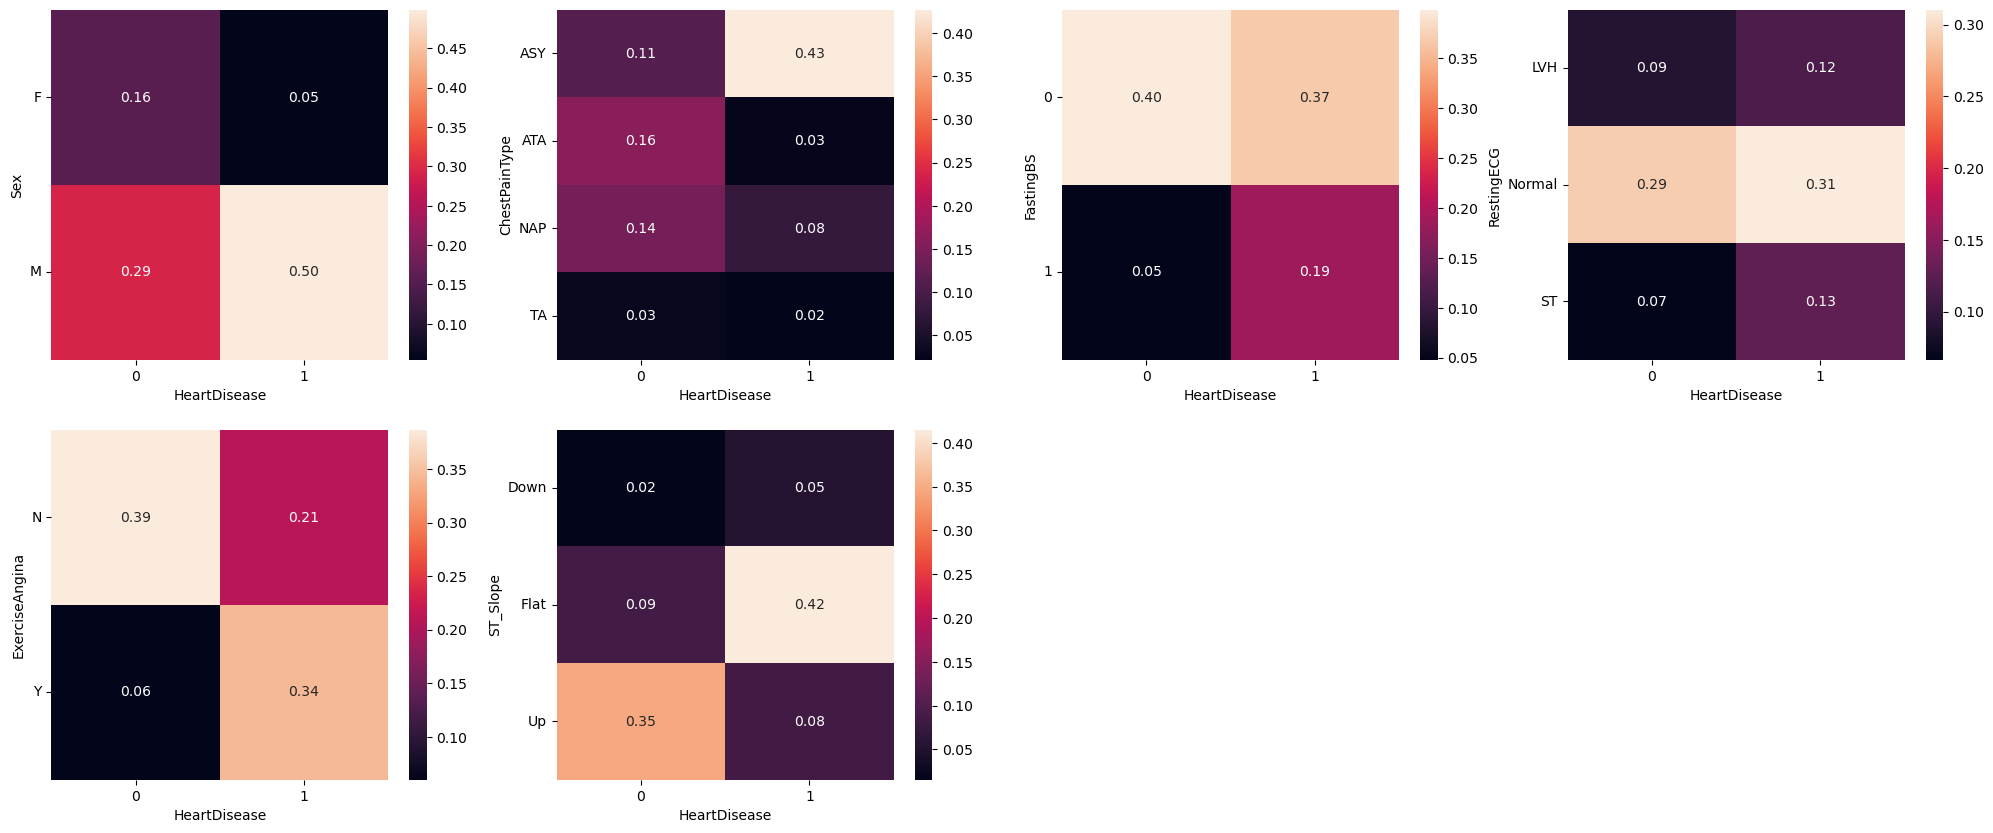

In [9]:
suplots(df.select_dtypes('object').columns,'HeartDisease')

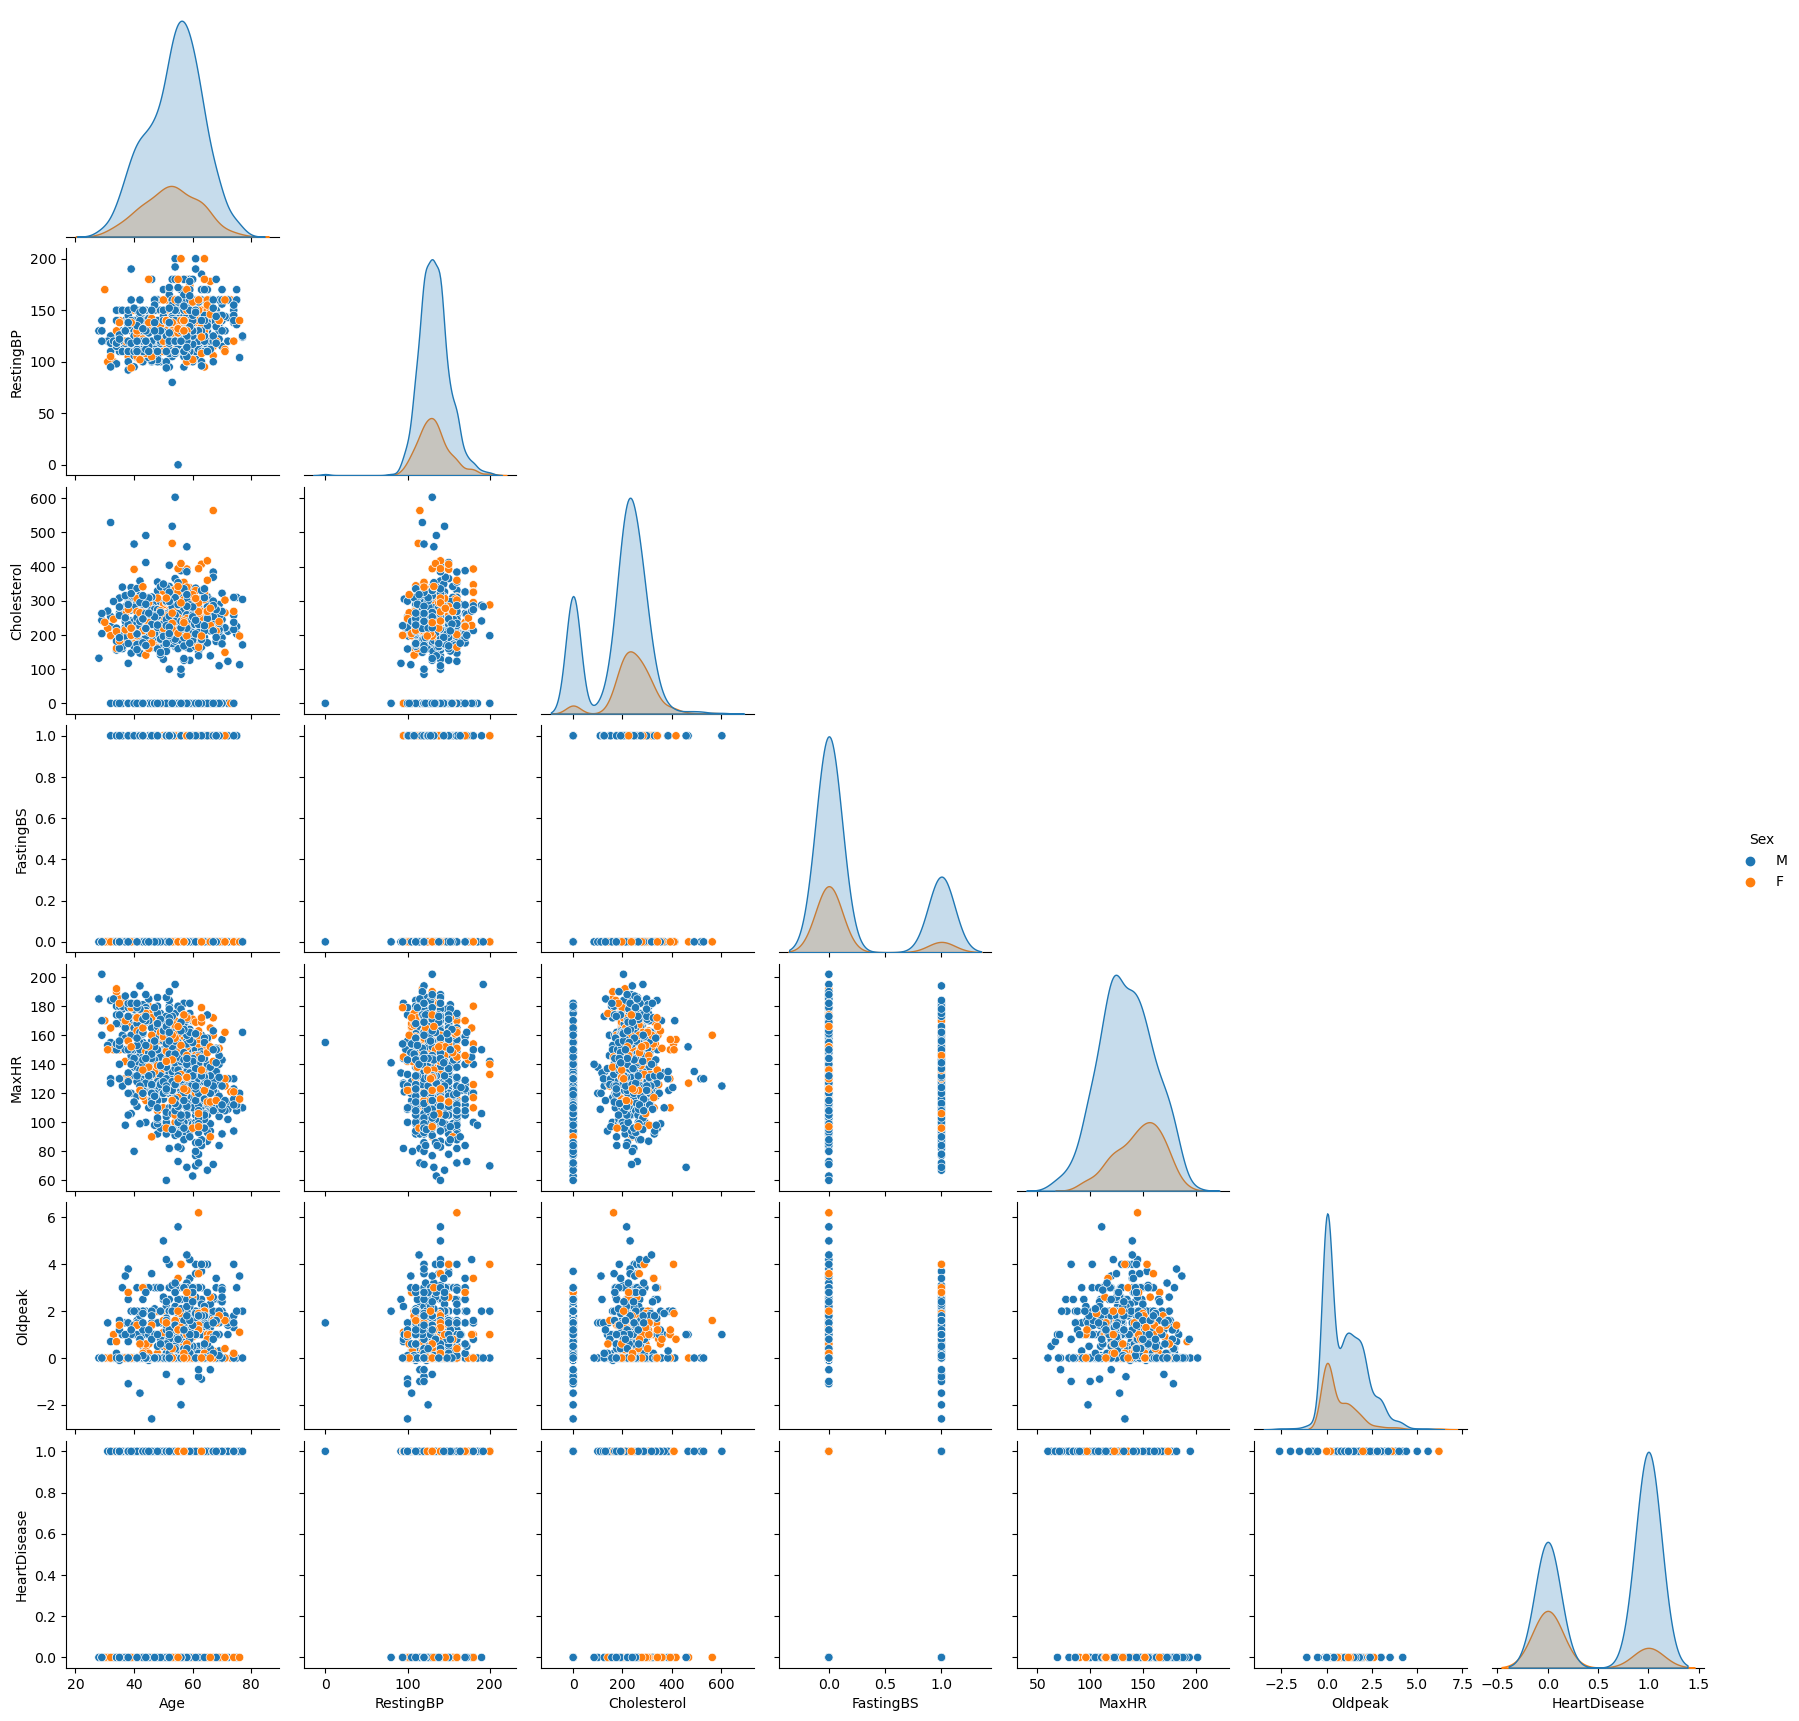

In [10]:
sns.pairplot(df,corner=True,hue='Sex')

<AxesSubplot:>

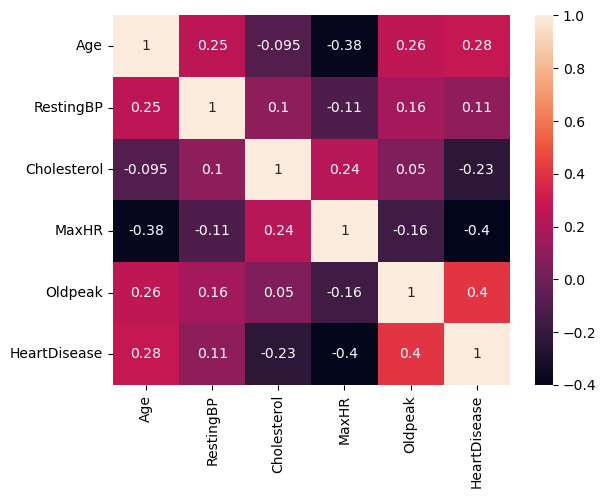

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

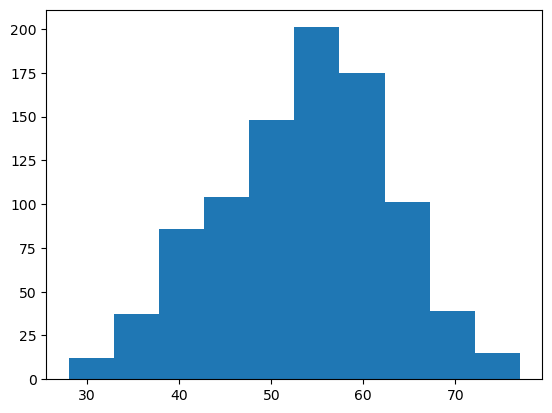

In [13]:
plt.hist(df.Age);

In [14]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

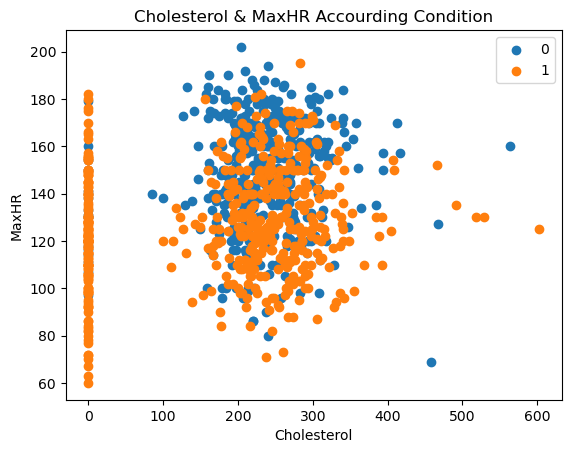

In [15]:
plt.scatter(df.Cholesterol[df.HeartDisease==0],df.MaxHR[df.HeartDisease==0])
plt.scatter(df.Cholesterol[df.HeartDisease==1],df.MaxHR[df.HeartDisease==1])
plt.xlabel("Cholesterol")
plt.ylabel("MaxHR")
plt.title("Cholesterol & MaxHR Accourding Condition")
plt.legend(df.HeartDisease)

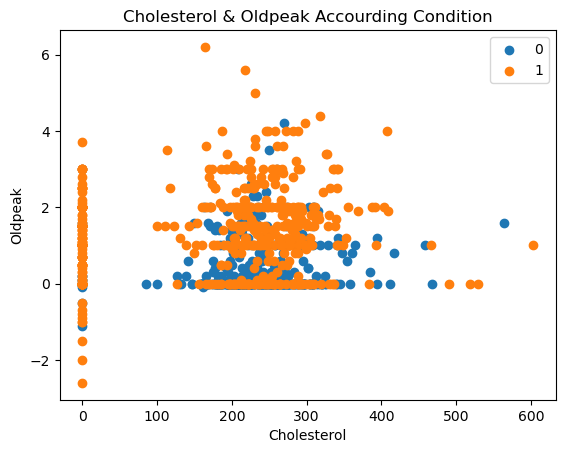

In [16]:
plt.scatter(df.Cholesterol[df.HeartDisease==0],df.Oldpeak[df.HeartDisease==0])
plt.scatter(df.Cholesterol[df.HeartDisease==1],df.Oldpeak[df.HeartDisease==1])
plt.xlabel("Cholesterol")
plt.ylabel("Oldpeak")
plt.title("Cholesterol & Oldpeak Accourding Condition")
plt.legend(df.HeartDisease)

In [17]:
# Create Column from Cholesterol
df['cat_Cholesterol']=np.asarray(df.Cholesterol==0).astype('object')

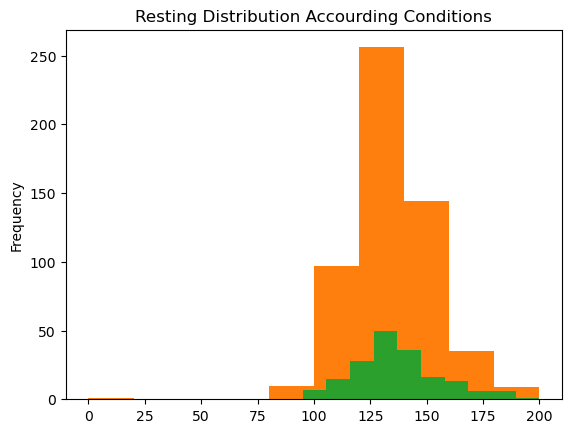

In [18]:
# RestingBP,RestingECG
df.RestingBP.groupby(df.RestingECG.values).plot(kind='hist',title='Resting Distribution Accourding Conditions');

### Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat=df.select_dtypes('object').columns[:-1].tolist()
cat_trans=Pipeline([('oe',OneHotEncoder(handle_unknown='ignore',drop='first'))])

num=df.select_dtypes(np.number).columns[:-1].tolist()[:-1]
pl_trans=Pipeline(steps=[('pl',PolynomialFeatures(5))])


preprocessor=ColumnTransformer([('cat_trans',cat_trans,cat)])

x=df.drop('HeartDisease',axis=1)
y=df.HeartDisease

## Build Model

In [20]:
import warnings
warnings.simplefilter('ignore')

In [21]:
from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=6)

for l in x_tr,x_te,y_tr,y_te:
    print(len(l))

734
184
734
184


In [22]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


def df_clfs(x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,
            classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),SVC(),RandomForestClassifier(),
                        AdaBoostClassifier(),XGBClassifier()]):
    """
    Function To Create Plot For Score of Classifiers with No Tunning
    """
    b_s={}
    for cl in classifier:
        clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",cl)])
        clf.fit(x_train,y_train)
        b_s[f"{cl}".split("(")[0]+" : ("+f"{clf.score(x_test,y_test)}"[:4]+")"]=clf.score(x_test,y_test)
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

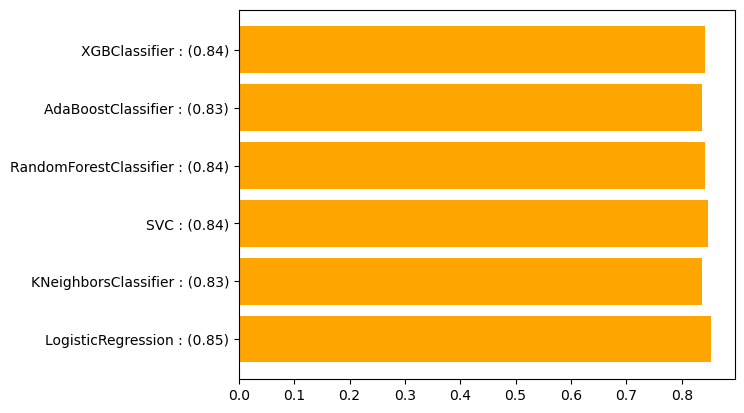

In [23]:
df_clfs()

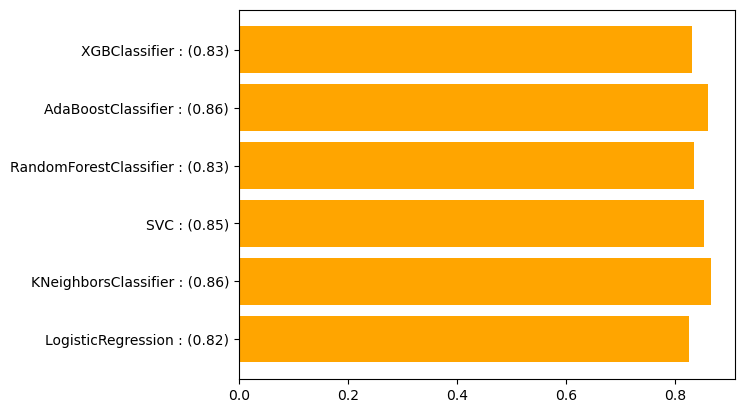

In [24]:
from sklearn.model_selection import cross_val_score

def rec_clfs(x,y,classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),
                             SVC(),RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]):
    """
    Function To Create Plot From Mean Of Cross Validation Scores `Recall` of Classifiers with No Tunning
    """
    b_s={}
    for cl in classifier:
        clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",cl)])
        val=np.mean(cross_val_score(clf,x,y,scoring="recall"))
        b_s[f"{cl}".split("(")[0]+" : ("+f"{val}"[:4]+")"]=val
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

rec_clfs(x,y)

## Tuning
* Accourding Previouse hbar some models have potential to improve

In [25]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler


def try_it(classifier,grid,sc='accuracy',x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,itr=20,ver=1):
    """
    Try Classifiers , Print Best Params , Best Score , Evaluate It With 
    Classification Report & Confusion Matrix
    """
    RS_clf=RandomizedSearchCV(classifier,grid,scoring=sc,cv=5,verbose=ver,n_iter=itr)
    RS_clf.fit(x_tr,y_tr)
    
    # Pirnt Model Name
    print(f"{classifier}")
    
    # Print Best Params & Score
    print(RS_clf.best_params_)
    print(RS_clf.best_score_)
    
    # classification_report
    y_pre=RS_clf.predict(x_te)
    print(classification_report(y_te,y_pre))
    
    # Plot Confusion Matrix
    plot_confusion_matrix(RS_clf,x,y)

### SVC

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', SVC())])
{'pl_trans__pl__degree': 2, 'clf__shrinking': False, 'clf__kernel': 'rbf', 'clf__gamma': 0.25, 'clf__coef0': 0.1, 'clf__C': 0.700000000000

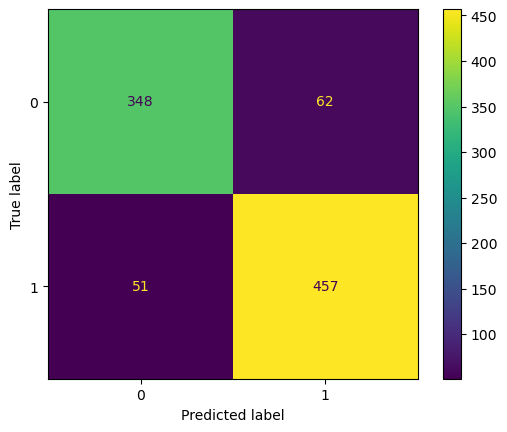

In [26]:
clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",SVC())])


svc_grid={"pl_trans__pl__degree":np.asarray([2,4,5,6]),
         "clf__C":np.arange(0.05,1,0.05),
         "clf__kernel":['linear','poly','rbf','sigmoid'],
         "clf__gamma":np.arange(0.05,1,0.05).tolist()+['auto','scale'],
         'clf__coef0': np.linspace(0, 1, 21),
         'clf__shrinking': [True, False]}

try_it(clf,svc_grid,sc='accuracy')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', SVC())])
{'pl_trans__pl__degree': 2, 'clf__shrinking': False, 'clf__kernel': 'linear', 'clf__gamma': 0.35000000000000003, 'clf__coef0': 0.1, 'clf__

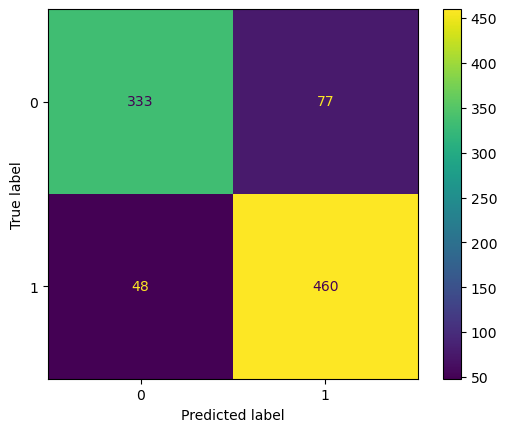

In [27]:
try_it(clf,svc_grid,sc='recall_macro')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', SVC())])
{'pl_trans__pl__degree': 2, 'clf__shrinking': False, 'clf__kernel': 'linear', 'clf__gamma': 0.9000000000000001, 'clf__coef0': 0.9500000000

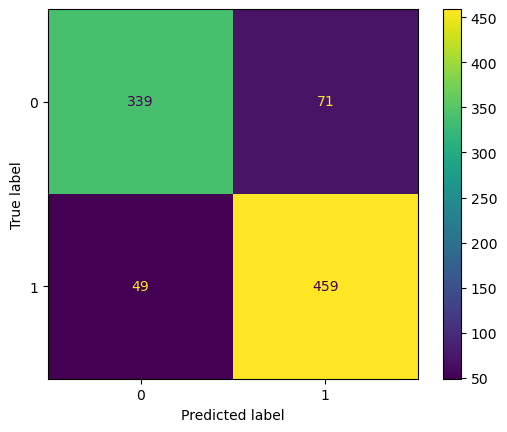

In [28]:
try_it(clf,svc_grid,sc='f1_macro')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__C=0.55, clf__coef0=0.65, clf__gamma=auto, clf__kernel=linear, clf__shrinking=True, pl_trans__pl__degree=6;, score=0.806 total time=   0.6s
[CV 2/5] END clf__C=0.55, clf__coef0=0.65, clf__gamma=auto, clf__kernel=linear, clf__shrinking=True, pl_trans__pl__degree=6;, score=0.837 total time=   0.6s
[CV 3/5] END clf__C=0.55, clf__coef0=0.65, clf__gamma=auto, clf__kernel=linear, clf__shrinking=True, pl_trans__pl__degree=6;, score=0.869 total time=   0.6s
[CV 4/5] END clf__C=0.55, clf__coef0=0.65, clf__gamma=auto, clf__kernel=linear, clf__shrinking=True, pl_trans__pl__degree=6;, score=0.792 total time=   0.5s
[CV 5/5] END clf__C=0.55, clf__coef0=0.65, clf__gamma=auto, clf__kernel=linear, clf__shrinking=True, pl_trans__pl__degree=6;, score=0.816 total time=   0.6s
{'clf__C': 0.55, 'clf__coef0': 0.65, 'clf__gamma': 'auto', 'clf__kernel': 'linear', 'clf__shrinking': True, 'pl_trans__pl__degree': 6}
0.8239200671725546
  

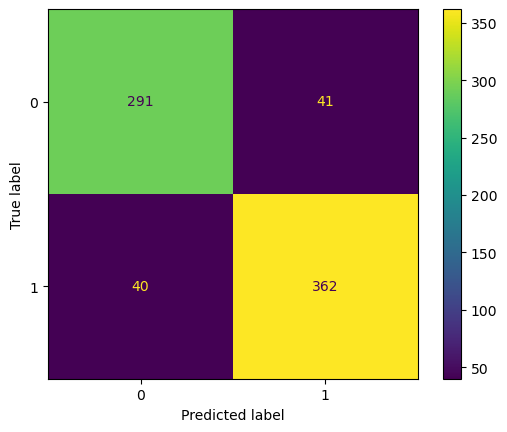

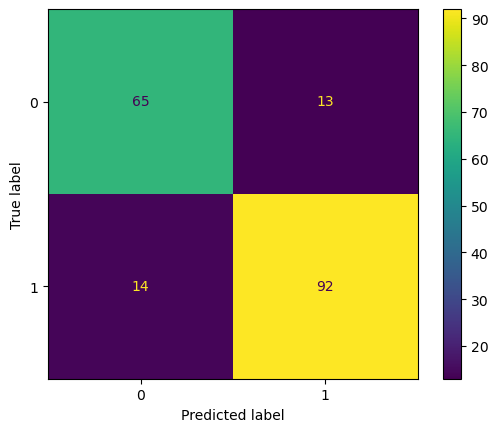

In [29]:
np.random.seed(20)

clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",SVC())])


svc_grid={"pl_trans__pl__degree":[6],
         "clf__C":[0.55],
         "clf__kernel":['linear'],
         "clf__gamma":['auto'],
         'clf__coef0': [0.65],
         'clf__shrinking': [True]}


gr_clf=GridSearchCV(clf,svc_grid,verbose=4,scoring='recall_macro')
gr_clf.fit(x_tr,y_tr)

# Print Best Params & Score
print(gr_clf.best_params_)
print(gr_clf.best_score_)

# classification_report
y_pre=gr_clf.predict(x_te)
print(classification_report(y_te,y_pre))

# Plot Confusion Matrix
plot_confusion_matrix(gr_clf,x_tr,y_tr)
plot_confusion_matrix(gr_clf,x_te,y_te)


0.85062893081761


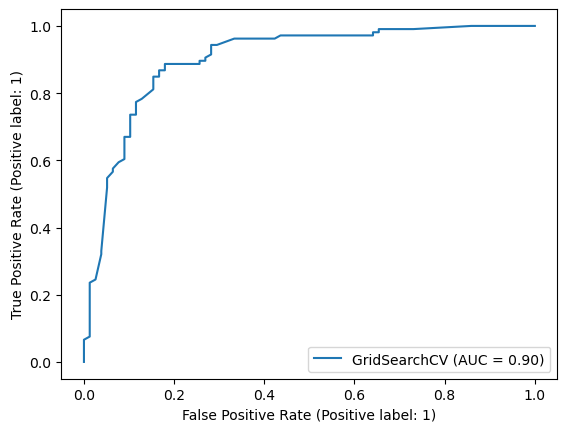

In [30]:
print(roc_auc_score(y_te,gr_clf.predict(x_te)))
plot_roc_curve(gr_clf,x_te,y_te)

### KNeighborsClassifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', KNeighborsClassifier(n_jobs=10))])
{'pl_trans__pl__degree': 6, 'clf__weights': 'uniform', 'clf__p': 2, 'clf__n_neighbors': 9, 'clf__leaf_size': 18,

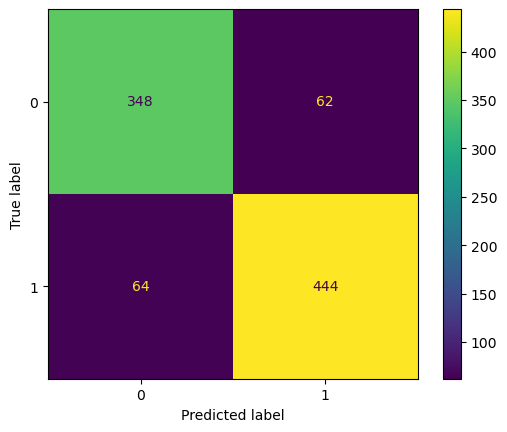

In [31]:
clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",KNeighborsClassifier(n_jobs=10))])

kn_grid={"pl_trans__pl__degree":np.asarray([4,5,6,8]),
         "clf__n_neighbors":np.arange(2,20),
         "clf__weights":['uniform','distance'],
         "clf__leaf_size":np.arange(1,50),
         'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
         "clf__p":[1,2]}

try_it(clf,kn_grid,sc='accuracy')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', KNeighborsClassifier(n_jobs=10))])
{'pl_trans__pl__degree': 5, 'clf__weights': 'uniform', 'clf__p': 2, 'clf__n_neighbors': 17, 'clf__leaf_size': 49

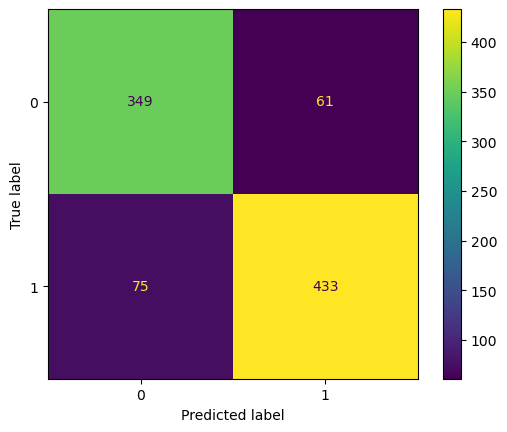

In [32]:
try_it(clf,kn_grid,sc='recall_macro')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', KNeighborsClassifier(n_jobs=10))])
{'pl_trans__pl__degree': 6, 'clf__weights': 'uniform', 'clf__p': 2, 'clf__n_neighbors': 6, 'clf__leaf_size': 38,

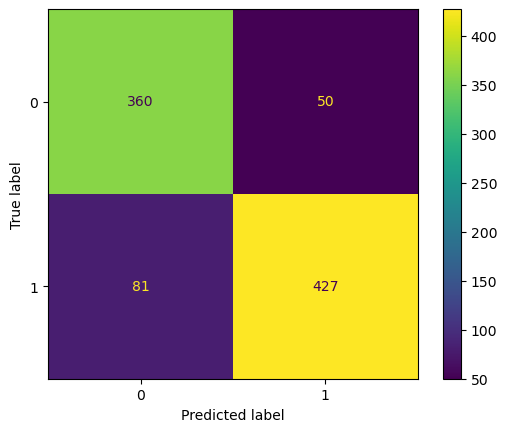

In [33]:
try_it(clf,kn_grid,sc='f1_macro')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__algorithm=kd_tree, clf__leaf_size=25, clf__n_neighbors=15, clf__p=1, clf__weights=uniform, pl_trans__pl__degree=6;, score=0.848 total time=   0.7s
[CV 2/5] END clf__algorithm=kd_tree, clf__leaf_size=25, clf__n_neighbors=15, clf__p=1, clf__weights=uniform, pl_trans__pl__degree=6;, score=0.796 total time=   0.7s
[CV 3/5] END clf__algorithm=kd_tree, clf__leaf_size=25, clf__n_neighbors=15, clf__p=1, clf__weights=uniform, pl_trans__pl__degree=6;, score=0.877 total time=   0.7s
[CV 4/5] END clf__algorithm=kd_tree, clf__leaf_size=25, clf__n_neighbors=15, clf__p=1, clf__weights=uniform, pl_trans__pl__degree=6;, score=0.815 total time=   0.7s
[CV 5/5] END clf__algorithm=kd_tree, clf__leaf_size=25, clf__n_neighbors=15, clf__p=1, clf__weights=uniform, pl_trans__pl__degree=6;, score=0.841 total time=   0.7s
{'clf__algorithm': 'kd_tree', 'clf__leaf_size': 25, 'clf__n_neighbors': 15, 'clf__p': 1, 'clf__weights': 'uniform', 

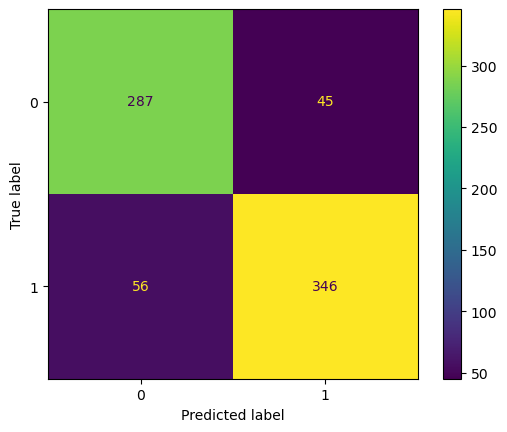

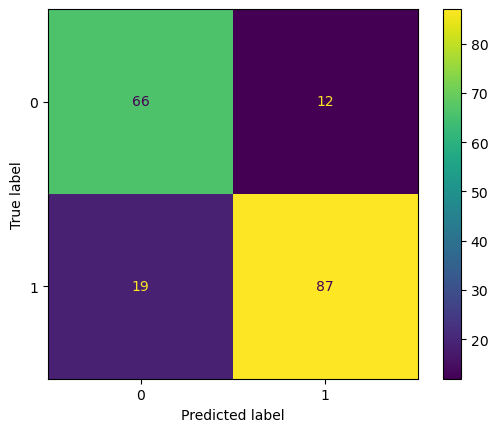

In [34]:
np.random.seed(20)

clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",KNeighborsClassifier(n_jobs=10))])

kn_grid={"pl_trans__pl__degree":[6],
         "clf__n_neighbors":[15],
         "clf__weights":['uniform'],
         "clf__leaf_size":[25],
         'clf__algorithm': ['kd_tree'],
         "clf__p":[1]}

gr_clf=GridSearchCV(clf,kn_grid,verbose=4,scoring='f1_macro')
gr_clf.fit(x_tr,y_tr)

# Print Best Params & Score
print(gr_clf.best_params_)
print(gr_clf.best_score_)

# classification_report
y_pre=gr_clf.predict(x_te)
print(classification_report(y_te,y_pre))

# Plot Confusion Matrix
plot_confusion_matrix(gr_clf,x_tr,y_tr)
plot_confusion_matrix(gr_clf,x_te,y_te)

0.8334542815674892


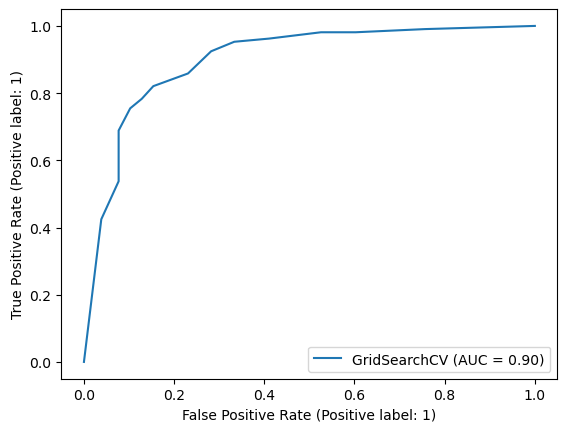

In [35]:
print(roc_auc_score(y_te,gr_clf.predict(x_te)))
plot_roc_curve(gr_clf,x_te,y_te)

### RandomForestClassifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', RandomForestClassifier(n_jobs=10))])
{'pl_trans__pl__degree': 2, 'clf__n_estimators': 476, 'clf__min_samples_split': 15, 'clf__min_samples_leaf': 4

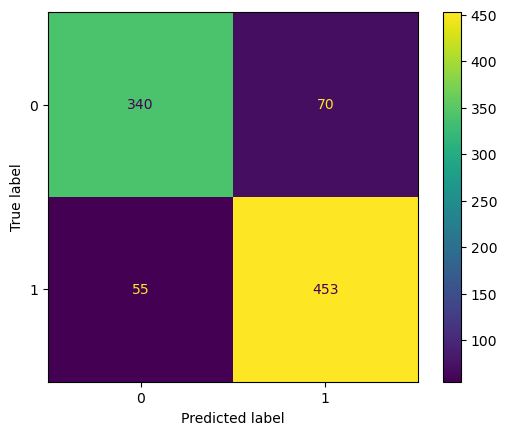

In [36]:
clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",RandomForestClassifier(n_jobs=10))])

rfc_grid={"pl_trans__pl__degree":[2,4,6,8],
          "clf__n_estimators":np.arange(100,500),
          "clf__max_depth":np.arange(2,20),
          "clf__min_samples_split":np.arange(5,40),
          "clf__min_samples_leaf":np.arange(2,10),
          "clf__max_features":np.arange(2,6),
          "clf__criterion":["gini", "entropy"],
          "clf__class_weight":["balanced","balanced_subsample"]}


try_it(clf,rfc_grid,sc='accuracy')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', RandomForestClassifier(n_jobs=10))])
{'pl_trans__pl__degree': 2, 'clf__n_estimators': 486, 'clf__min_samples_split': 39, 'clf__min_samples_leaf': 3

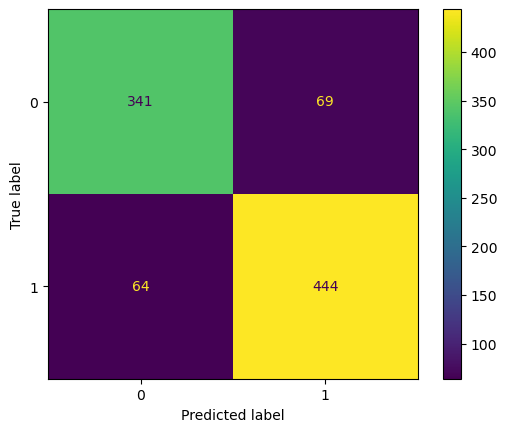

In [37]:
try_it(clf,rfc_grid,sc='recall')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', RandomForestClassifier(n_jobs=10))])
{'pl_trans__pl__degree': 2, 'clf__n_estimators': 378, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 4,

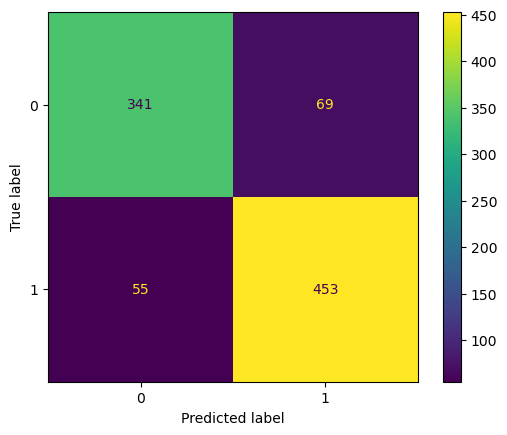

In [38]:
try_it(clf,rfc_grid,sc='f1')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__class_weight=balanced, clf__criterion=entropy, pl_trans__pl__degree=4;, score=0.884 total time=   1.0s
[CV 2/5] END clf__class_weight=balanced, clf__criterion=entropy, pl_trans__pl__degree=4;, score=0.810 total time=   0.4s
[CV 3/5] END clf__class_weight=balanced, clf__criterion=entropy, pl_trans__pl__degree=4;, score=0.871 total time=   0.4s
[CV 4/5] END clf__class_weight=balanced, clf__criterion=entropy, pl_trans__pl__degree=4;, score=0.823 total time=   0.4s
[CV 5/5] END clf__class_weight=balanced, clf__criterion=entropy, pl_trans__pl__degree=4;, score=0.870 total time=   0.4s
{'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'pl_trans__pl__degree': 4}
0.8515236231478893
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        78
           1       0.87      0.86      0.86       106

    accuracy                           0.84       184
   macro 

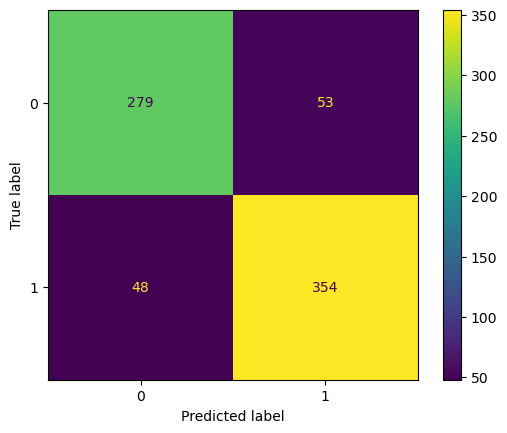

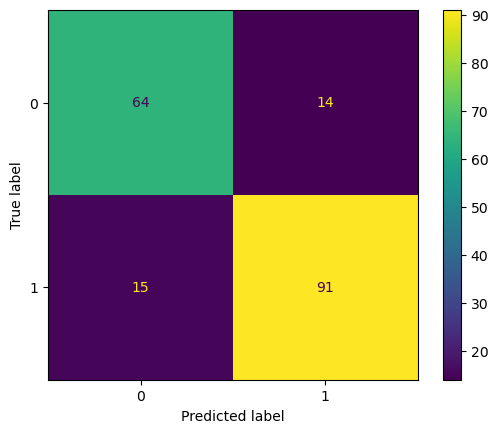

In [39]:
np.random.seed(20)


clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",RandomForestClassifier(n_jobs=-1,n_estimators=101,max_depth=12,
                                                                                                     min_samples_leaf=5,min_samples_split=27,
                                                                                                     max_features=5))])

rfc_grid={"pl_trans__pl__degree":[4],
          "clf__criterion":["entropy"],
          "clf__class_weight":["balanced"]}

gr_clf=GridSearchCV(clf,rfc_grid,verbose=4,scoring='accuracy')
gr_clf.fit(x_tr,y_tr)

# Print Best Params & Score
print(gr_clf.best_params_)
print(gr_clf.best_score_)

# classification_report
y_pre=gr_clf.predict(x_te)
print(classification_report(y_te,y_pre))

# Plot Confusion Matrix
plot_confusion_matrix(gr_clf,x_tr,y_tr)
plot_confusion_matrix(gr_clf,x_te,y_te)

0.8395016932752782


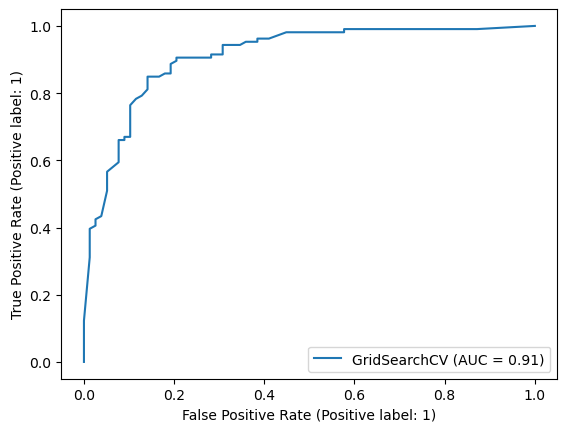

In [40]:
from sklearn.metrics import roc_auc_score,plot_roc_curve
print(roc_auc_score(y_te,gr_clf.predict(x_te)))
plot_roc_curve(gr_clf,x_te,y_te)

### AdaBoostClassifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', AdaBoostClassifier())])
{'pl_trans__pl__degree': 2, 'clf__n_estimators': 249, 'clf__learning_rate': 0.2}
0.851486347963843
              precision 

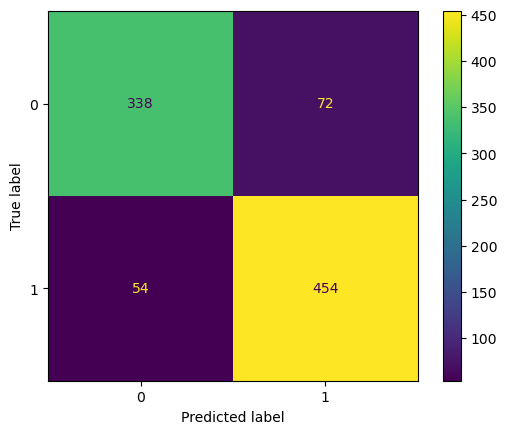

In [41]:
clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",AdaBoostClassifier())])

ada_grid={"pl_trans__pl__degree":[2,4],
          "clf__n_estimators":np.arange(100,500),
          "clf__learning_rate":np.arange(0,1.05,0.05)}

try_it(clf,ada_grid,sc='accuracy')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', AdaBoostClassifier())])
{'pl_trans__pl__degree': 2, 'clf__n_estimators': 306, 'clf__learning_rate': 0.05}
0.8906172839506172
              precisio

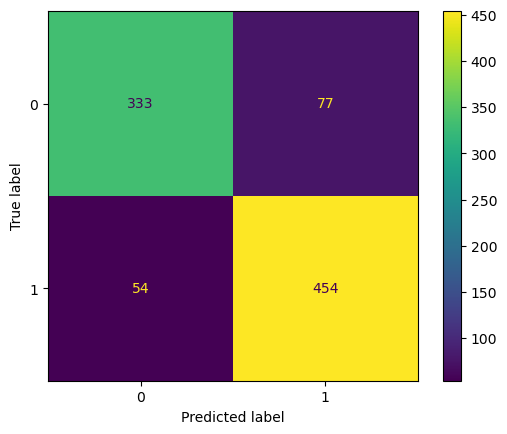

In [42]:
try_it(clf,ada_grid,sc='recall')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf', AdaBoostClassifier())])
{'pl_trans__pl__degree': 2, 'clf__n_estimators': 478, 'clf__learning_rate': 0.1}
0.8676441621302532
              precision

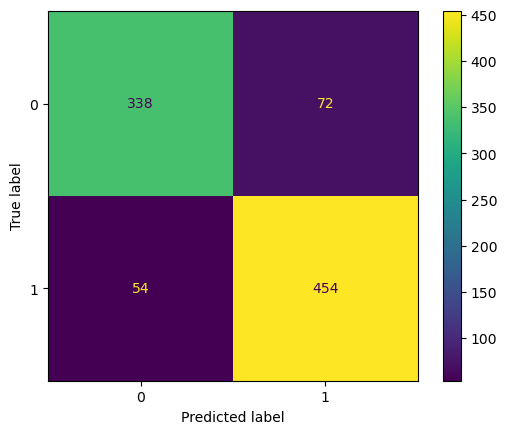

In [43]:
try_it(clf,ada_grid,sc='f1')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__learning_rate=0.1, clf__n_estimators=202, pl_trans__pl__degree=3;, score=0.851 total time=   0.5s
[CV 2/5] END clf__learning_rate=0.1, clf__n_estimators=202, pl_trans__pl__degree=3;, score=0.823 total time=   0.5s
[CV 3/5] END clf__learning_rate=0.1, clf__n_estimators=202, pl_trans__pl__degree=3;, score=0.884 total time=   0.5s
[CV 4/5] END clf__learning_rate=0.1, clf__n_estimators=202, pl_trans__pl__degree=3;, score=0.811 total time=   0.5s
[CV 5/5] END clf__learning_rate=0.1, clf__n_estimators=202, pl_trans__pl__degree=3;, score=0.870 total time=   0.5s
{'clf__learning_rate': 0.1, 'clf__n_estimators': 202, 'pl_trans__pl__degree': 3}
0.8476995284520161
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        78
           1       0.86      0.92      0.89       106

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86

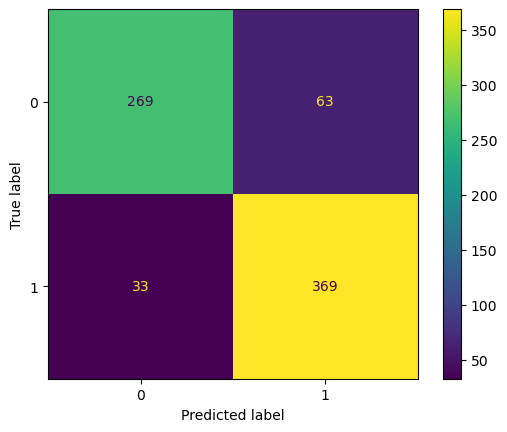

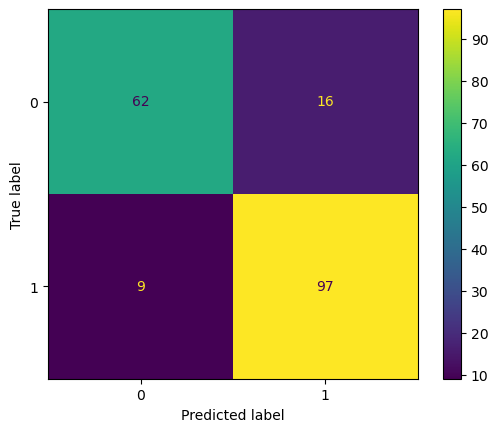

In [44]:
np.random.seed(6)

clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",AdaBoostClassifier())])


ada_grid={"pl_trans__pl__degree":[3],
          "clf__n_estimators":[202],
          "clf__learning_rate":[0.1]}

gr_clf=GridSearchCV(clf,ada_grid,verbose=4,scoring='recall_macro')
gr_clf.fit(x_tr,y_tr)

# Print Best Params & Score
print(gr_clf.best_params_)
print(gr_clf.best_score_)

# classification_report
y_pre=gr_clf.predict(x_te)
print(classification_report(y_te,y_pre))

# Plot Confusion Matrix
plot_confusion_matrix(gr_clf,x_tr,y_tr)
plot_confusion_matrix(gr_clf,x_te,y_te)

0.8549830672472182


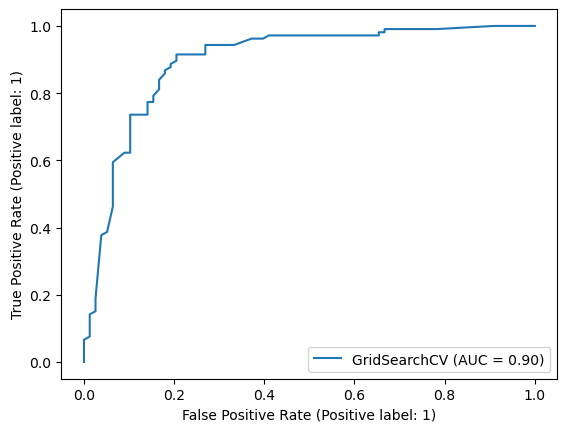

In [45]:
print(roc_auc_score(y_te,gr_clf.predict(x_te)))
plot_roc_curve(gr_clf,x_te,y_te)

### XGBClassifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf',
                 XGBClassifier(base_score=None, booster=Non...
                               gamma=None, gpu_id=None, grow_policy=None,
          

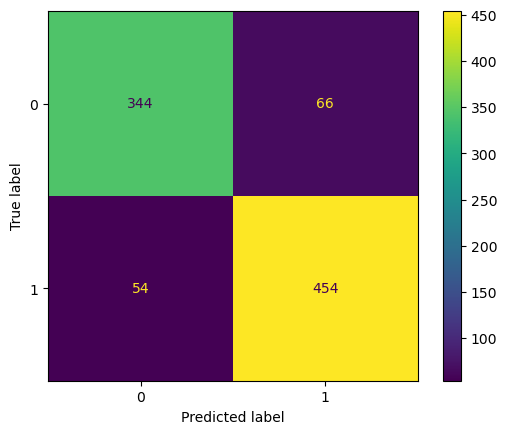

In [46]:
# from xgboost import XGBClassifier
np.random.seed(6)
clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",XGBClassifier(use_label_encoder=False))])

xgb_grid={"pl_trans__pl__degree":[2,4,6,8],
          "clf__max_depth":np.arange(2,10),
          "clf__learning_rate":np.arange(0.005,0.5,0.005),
          "clf__gamma":np.arange(0,1.05,0.05),
          "clf__reg_lambda":np.arange(10),
          "clf__scale_pos_weight":np.arange(10)}

try_it(clf,xgb_grid,sc='accuracy')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  Pipeline(steps=[('oe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('pl_trans',
                 Pipeline(steps=[('pl', PolynomialFeatures(degree=5))])),
                ('clf',
                 XGBClassifier(base_score=None, booster=Non...
                               gamma=None, gpu_id=None, grow_policy=None,
          

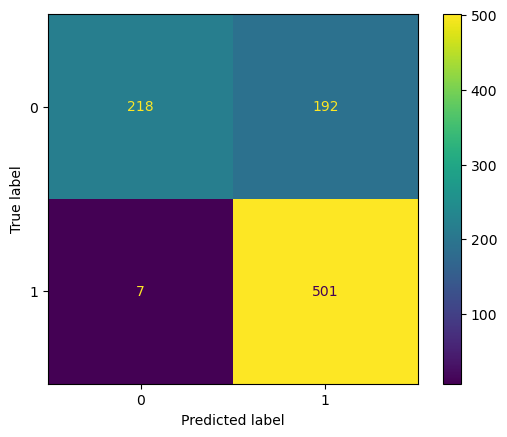

In [47]:
try_it(clf,xgb_grid,sc='recall')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END clf__gamma=0.05, clf__learning_rate=0.495, clf__max_depth=8, clf__reg_lambda=4, clf__scale_pos_weight=4, pl_trans__pl__degree=8;, score=0.837 total time=  51.3s
[CV 2/5] END clf__gamma=0.05, clf__learning_rate=0.495, clf__max_depth=8, clf__reg_lambda=4, clf__scale_pos_weight=4, pl_trans__pl__degree=8;, score=0.828 total time=  50.1s
[CV 3/5] END clf__gamma=0.05, clf__learning_rate=0.495, clf__max_depth=8, clf__reg_lambda=4, clf__scale_pos_weight=4, pl_trans__pl__degree=8;, score=0.870 total time=  51.0s
[CV 4/5] END clf__gamma=0.05, clf__learning_rate=0.495, clf__max_depth=8, clf__reg_lambda=4, clf__scale_pos_weight=4, pl_trans__pl__degree=8;, score=0.804 total time=  51.0s
[CV 5/5] END clf__gamma=0.05, clf__learning_rate=0.495, clf__max_depth=8, clf__reg_lambda=4, clf__scale_pos_weight=4, pl_trans__pl__degree=8;, score=0.826 total time=  50.9s
[CV 1/5] END clf__gamma=0.7000000000000001, clf__learning_rate=0.485

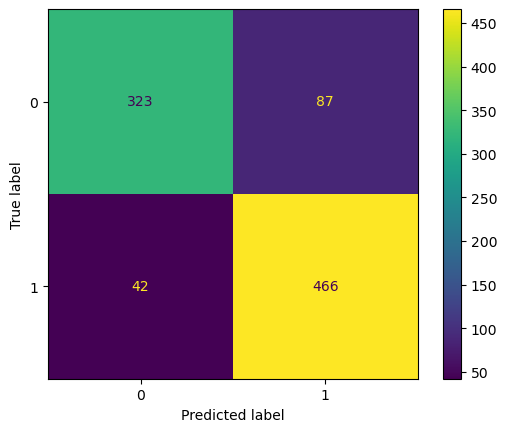

In [48]:
try_it(clf,xgb_grid,sc='f1',ver=4)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__gamma=0.7, clf__learning_rate=0.045, clf__max_depth=5, clf__reg_lambda=8, clf__scale_pos_weight=1, pl_trans__pl__degree=4;, score=0.853 total time=   1.1s
[CV 2/5] END clf__gamma=0.7, clf__learning_rate=0.045, clf__max_depth=5, clf__reg_lambda=8, clf__scale_pos_weight=1, pl_trans__pl__degree=4;, score=0.815 total time=   1.1s
[CV 3/5] END clf__gamma=0.7, clf__learning_rate=0.045, clf__max_depth=5, clf__reg_lambda=8, clf__scale_pos_weight=1, pl_trans__pl__degree=4;, score=0.870 total time=   1.8s
[CV 4/5] END clf__gamma=0.7, clf__learning_rate=0.045, clf__max_depth=5, clf__reg_lambda=8, clf__scale_pos_weight=1, pl_trans__pl__degree=4;, score=0.811 total time=   1.2s
[CV 5/5] END clf__gamma=0.7, clf__learning_rate=0.045, clf__max_depth=5, clf__reg_lambda=8, clf__scale_pos_weight=1, pl_trans__pl__degree=4;, score=0.866 total time=   1.1s
{'clf__gamma': 0.7, 'clf__learning_rate': 0.045, 'clf__max_depth': 5, 'clf__

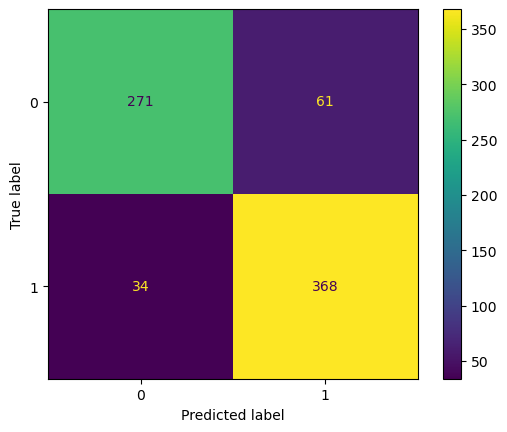

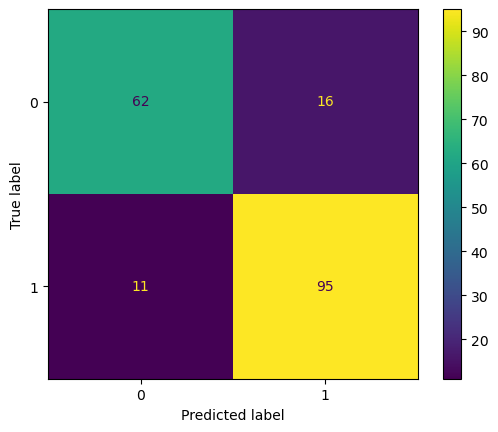

In [49]:
np.random.seed(6)

clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",XGBClassifier(use_label_encoder=False))])

xgb_grid={"pl_trans__pl__degree":[4],
          "clf__max_depth":[5],
          "clf__learning_rate":[0.045],
          "clf__gamma":[0.7],
          "clf__reg_lambda":[8],
          "clf__scale_pos_weight":[1]}

gr_clf=GridSearchCV(clf,xgb_grid,verbose=4,scoring='f1_macro')
gr_clf.fit(x_tr,y_tr)

# Print Best Params & Score
print(gr_clf.best_params_)
print(gr_clf.best_score_)

# classification_report
y_pre=gr_clf.predict(x_te)
print(classification_report(y_te,y_pre))

# Plot Confusion Matrix
plot_confusion_matrix(gr_clf,x_tr,y_tr)
plot_confusion_matrix(gr_clf,x_te,y_te)

0.8455491049830673


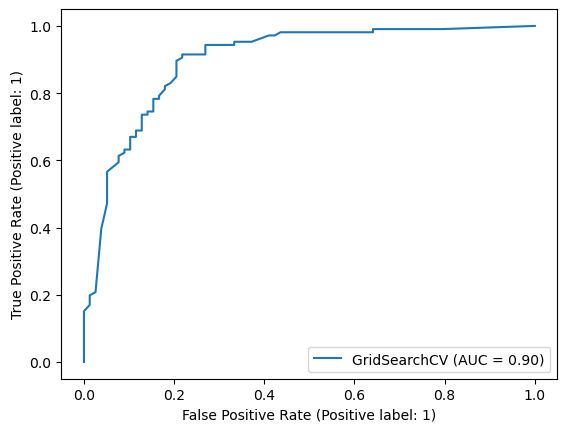

In [50]:
print(roc_auc_score(y_te,gr_clf.predict(x_te)))
plot_roc_curve(gr_clf,x_te,y_te)

### LogisticRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END clf__C=0.03359818286283781, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=750, clf__penalty=l1, clf__solver=lbfgs, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 2/5] END clf__C=0.03359818286283781, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=750, clf__penalty=l1, clf__solver=lbfgs, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 3/5] END clf__C=0.03359818286283781, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=750, clf__penalty=l1, clf__solver=lbfgs, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 4/5] END clf__C=0.03359818286283781, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=750, clf__penalty=l1, clf__solver=lbfgs, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 5/5] END clf__C=0.03359818286283781, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=750, clf__pen

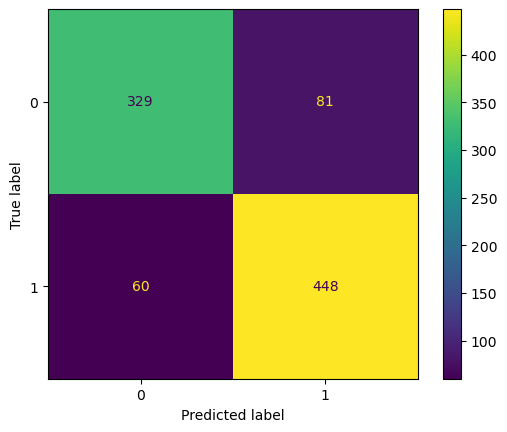

In [51]:
clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",LogisticRegression(max_iter=1000,n_jobs=-1))])

log_grid = {"pl_trans__pl__degree":[2,4,6,8],
            'clf__penalty': ['l1', 'l2', 'elasticnet'],
            'clf__C': np.logspace(-4, 4, 20),
            'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'clf__fit_intercept': [True, False],
            'clf__class_weight': [None, 'balanced'],
            'clf__max_iter': np.arange(50, 1000, 50)}

try_it(clf,log_grid,sc='accuracy',itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END clf__C=1.623776739188721, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=750, clf__penalty=elasticnet, clf__solver=liblinear, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 2/5] END clf__C=1.623776739188721, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=750, clf__penalty=elasticnet, clf__solver=liblinear, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 3/5] END clf__C=1.623776739188721, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=750, clf__penalty=elasticnet, clf__solver=liblinear, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 4/5] END clf__C=1.623776739188721, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=750, clf__penalty=elasticnet, clf__solver=liblinear, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 5/5] END clf__C=1.623776739188721, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reach

[CV 3/5] END clf__C=0.23357214690901212, clf__class_weight=balanced, clf__fit_intercept=True, clf__max_iter=250, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.865 total time= 2.0min
[CV 4/5] END clf__C=0.23357214690901212, clf__class_weight=balanced, clf__fit_intercept=True, clf__max_iter=250, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.800 total time= 2.0min
[CV 5/5] END clf__C=0.23357214690901212, clf__class_weight=balanced, clf__fit_intercept=True, clf__max_iter=250, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.823 total time= 2.0min
[CV 1/5] END clf__C=545.5594781168514, clf__class_weight=None, clf__fit_intercept=False, clf__max_iter=850, clf__penalty=l1, clf__solver=sag, pl_trans__pl__degree=6;, score=nan total time=   0.0s
[CV 2/5] END clf__C=545.5594781168514, clf__class_weight=None, clf__fit_intercept=False, clf__max_iter=850, clf__penalty=l1, clf__solver=sag, pl_trans__pl__degree=6;, score=nan total time=   0

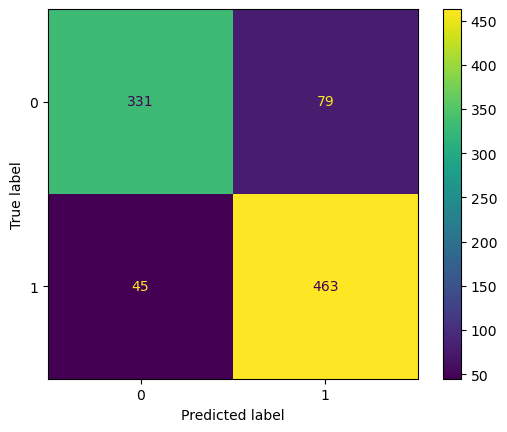

In [52]:
try_it(clf,log_grid,sc='recall_macro',itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END clf__C=0.0006951927961775605, clf__class_weight=None, clf__fit_intercept=False, clf__max_iter=800, clf__penalty=l2, clf__solver=lbfgs, pl_trans__pl__degree=2;, score=0.859 total time=   0.0s
[CV 2/5] END clf__C=0.0006951927961775605, clf__class_weight=None, clf__fit_intercept=False, clf__max_iter=800, clf__penalty=l2, clf__solver=lbfgs, pl_trans__pl__degree=2;, score=0.834 total time=   0.0s
[CV 3/5] END clf__C=0.0006951927961775605, clf__class_weight=None, clf__fit_intercept=False, clf__max_iter=800, clf__penalty=l2, clf__solver=lbfgs, pl_trans__pl__degree=2;, score=0.861 total time=   0.0s
[CV 4/5] END clf__C=0.0006951927961775605, clf__class_weight=None, clf__fit_intercept=False, clf__max_iter=800, clf__penalty=l2, clf__solver=lbfgs, pl_trans__pl__degree=2;, score=0.816 total time=   0.0s
[CV 5/5] END clf__C=0.0006951927961775605, clf__class_weight=None, clf__fit_intercept=False, clf__max_iter=800, clf__penal

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reach

[CV 3/5] END clf__C=10000.0, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=250, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.869 total time= 2.0min
[CV 4/5] END clf__C=10000.0, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=250, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.787 total time= 2.0min
[CV 5/5] END clf__C=10000.0, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=250, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.832 total time= 2.0min
[CV 1/5] END clf__C=0.004832930238571752, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=350, clf__penalty=l2, clf__solver=sag, pl_trans__pl__degree=2;, score=0.874 total time=   0.0s
[CV 2/5] END clf__C=0.004832930238571752, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=350, clf__penalty=l2, clf__solver=sag, pl_trans__pl__degree=2;, score=0.802 total time=   0.3s
[CV 3/5] END clf__C=0.0048

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END clf__C=0.23357214690901212, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=300, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.863 total time= 2.4min
[CV 4/5] END clf__C=0.23357214690901212, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=300, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.800 total time= 2.4min
[CV 5/5] END clf__C=0.23357214690901212, clf__class_weight=balanced, clf__fit_intercept=False, clf__max_iter=300, clf__penalty=l2, clf__solver=saga, pl_trans__pl__degree=8;, score=0.825 total time= 2.4min
[CV 1/5] END clf__C=0.0018329807108324356, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=700, clf__penalty=l1, clf__solver=newton-cg, pl_trans__pl__degree=4;, score=nan total time=   0.0s
[CV 2/5] END clf__C=0.0018329807108324356, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=700, clf__penalty=l1, clf__solver=newton-cg, pl_trans__pl__degree=4;, scor

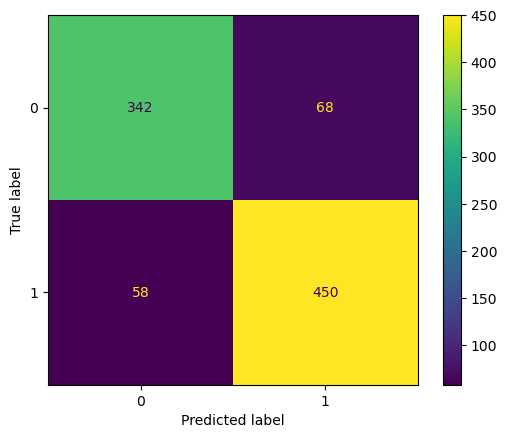

In [53]:
try_it(clf,log_grid,sc='f1_macro',itr=20,ver=4)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END clf__C=0.24, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=200, clf__penalty=l2, clf__solver=liblinear, pl_trans__pl__degree=2;, score=0.858 total time=   0.0s
[CV 2/5] END clf__C=0.24, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=200, clf__penalty=l2, clf__solver=liblinear, pl_trans__pl__degree=2;, score=0.830 total time=   0.0s
[CV 3/5] END clf__C=0.24, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=200, clf__penalty=l2, clf__solver=liblinear, pl_trans__pl__degree=2;, score=0.902 total time=   0.0s
[CV 4/5] END clf__C=0.24, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=200, clf__penalty=l2, clf__solver=liblinear, pl_trans__pl__degree=2;, score=0.840 total time=   0.0s
[CV 5/5] END clf__C=0.24, clf__class_weight=None, clf__fit_intercept=True, clf__max_iter=200, clf__penalty=l2, clf__solver=liblinear, pl_trans__pl__degree=2;, score=0.870 total time

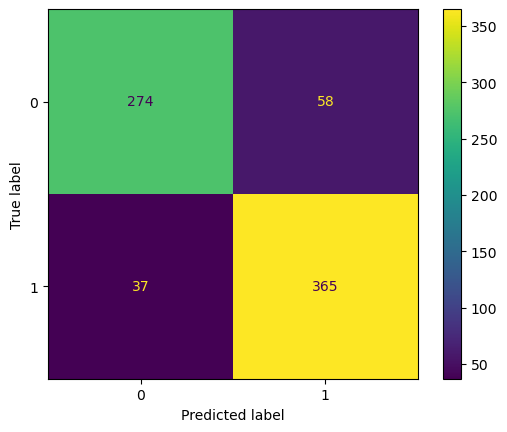

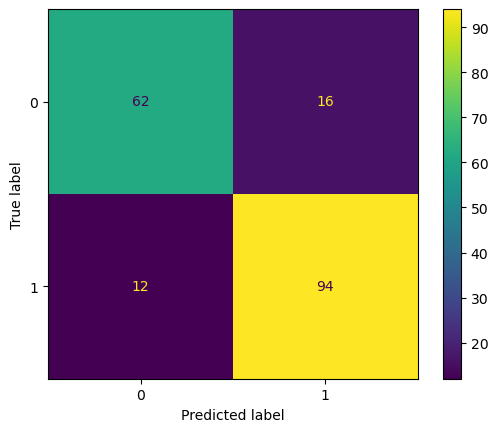

In [54]:
np.random.seed(6)

clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",LogisticRegression(max_iter=1000,n_jobs=-1))])

log_grid = {"pl_trans__pl__degree":[2],
            'clf__penalty': ['l2'],
            'clf__C': [0.24],
            'clf__solver': ['liblinear'],
            'clf__fit_intercept': [True],
            'clf__class_weight': [None],
            'clf__max_iter': [200]}

gr_clf=GridSearchCV(clf,log_grid,verbose=4,scoring='recall_macro')
gr_clf.fit(x_tr,y_tr)

# Print Best Params & Score
print(gr_clf.best_params_)
print(gr_clf.best_score_)

# classification_report
y_pre=gr_clf.predict(x_te)
print(classification_report(y_te,y_pre))

# Plot Confusion Matrix
plot_confusion_matrix(gr_clf,x_tr,y_tr)
plot_confusion_matrix(gr_clf,x_te,y_te)

0.8408321238509918


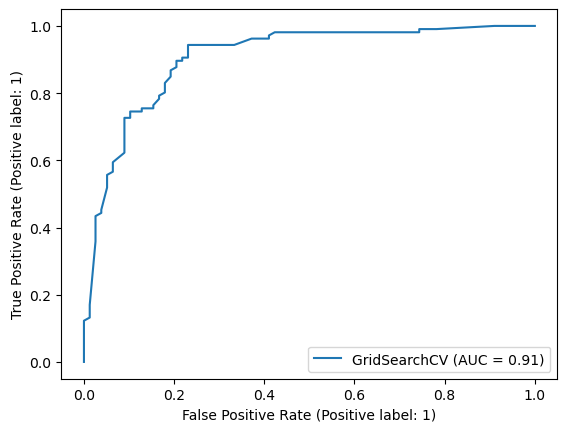

In [55]:
print(roc_auc_score(y_te,gr_clf.predict(x_te)))
plot_roc_curve(gr_clf,x_te,y_te)

## Evaluating Models
* Evaluate Best Models We Got From Tunning

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


# Build Evaluating Function

def eval_it(clf,name,x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,rand_st=20):
    """
    Function To Apply Multi Score Metrics on classifier and Return Values in shape of bar
    """
    # Fit The Classifier
    clf.fit(x_train,y_train)

    # Predict On Train Data 
    tr_y_pre=clf.predict(x_train)
    # Train Scores
    tr_acc=accuracy_score(y_train,tr_y_pre)
    tr_pre=precision_score(y_train,tr_y_pre)
    tr_rec=recall_score(y_train,tr_y_pre)
    tr_f1=f1_score(y_train,tr_y_pre)
    tr_roc=roc_auc_score(y_train,tr_y_pre)
    
    # Predict On Test Data 
    y_pre=clf.predict(x_test)
    # Test Scores
    acc=accuracy_score(y_test,y_pre)
    pre=precision_score(y_test,y_pre)
    rec=recall_score(y_test,y_pre)
    f1=f1_score(y_test,y_pre)
    roc=roc_auc_score(y_test,y_pre)
    
    # Assign Each to name in dict
    # Train
    tr_scs={'Accuracy':tr_acc,'Precision':tr_pre,'Recall':tr_rec,'F1':tr_f1,"ROC":tr_roc}
    tr_scrs=pd.DataFrame(tr_scs,index=[f'{name} Train Scores'])
    # Test
    te_scs={'Accuracy':acc,'Precision':pre,'Recall':rec,'F1':f1,"ROC":roc}
    te_scrs=pd.DataFrame(te_scs,index=[f'{name} Test Scores'])
    
    # Compine All Scores in one Dict and Plot in Horizontal Bar
    all_scrs=pd.DataFrame(data=(tr_scs.values(),te_scs.values()),columns=tr_scs.keys(),index=[f'{name} Train Scores',f'{name} Test Scores'])
    all_scrs.T.plot(kind='barh',title=f'{name} Train & Test Scores With Multi Metrics')
    return all_scrs

,Accuracy,Precision,Recall,F1,ROC
SVC Train Scores,0.889646,0.898263,0.900498,0.899379,0.888502
SVC Test Scores,0.853261,0.876190,0.867925,0.872038,0.850629


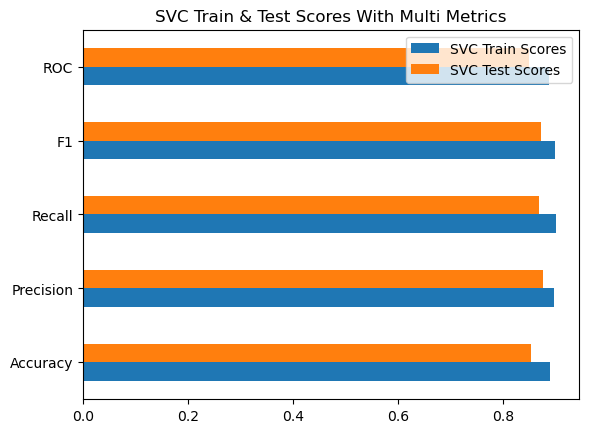

In [57]:
# SVC
np.random.seed(0)

pl_trans=Pipeline(steps=[('pl',PolynomialFeatures(6))]) 
svc_clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",SVC(C=0.55,kernel='linear',gamma='auto',coef0=0.65,
                                                                                      shrinking=True))])

eval_it(svc_clf,'SVC')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,Accuracy,Precision,Recall,F1,ROC
KNeighborsClassifier Train Scores,0.862398,0.884910,0.860697,0.872636,0.862577
KNeighborsClassifier Test Scores,0.831522,0.878788,0.820755,0.848780,0.833454


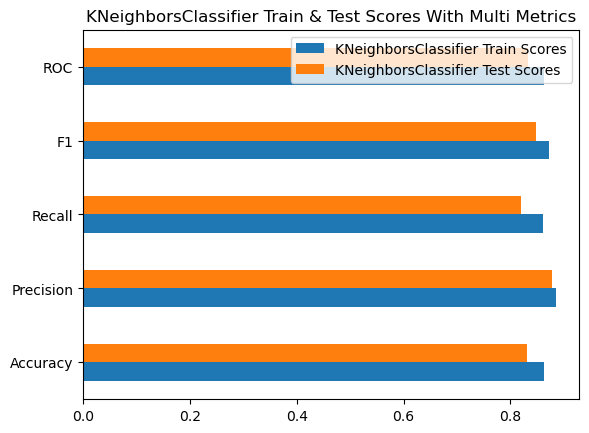

In [58]:
# KNeighborsClassifier
np.random.seed(6)

kn_clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",KNeighborsClassifier(n_jobs=10))])

kn_grid={"pl_trans__pl__degree":[6],
         "clf__n_neighbors":[15],
         "clf__weights":['uniform'],
         "clf__leaf_size":[25],
         'clf__algorithm': ['kd_tree'],
         "clf__p":[1]}

gr_kn_clf=GridSearchCV(kn_clf,kn_grid,verbose=1,scoring='f1_macro')

eval_it(gr_kn_clf,'KNeighborsClassifier')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,Accuracy,Precision,Recall,F1,ROC
RandomForestClassifier Train Scores,0.878747,0.878935,0.902985,0.890798,0.876191
RandomForestClassifier Test Scores,0.853261,0.862385,0.886792,0.874419,0.847242


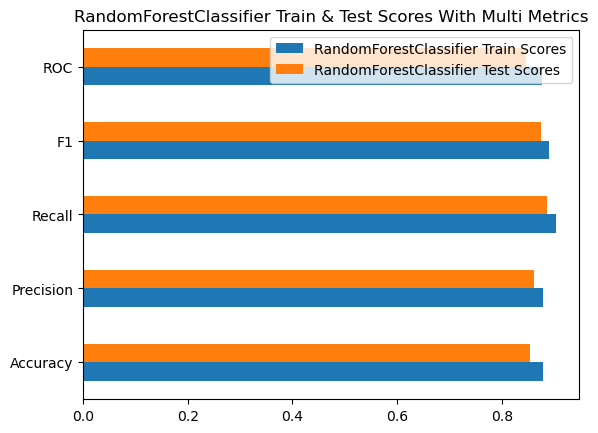

In [59]:
# RandomForestClassifier
np.random.seed(6)

pl_trans=Pipeline(steps=[('pl',PolynomialFeatures(4))]) 

rf_clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",RandomForestClassifier(n_estimators=230,max_depth=20,
                                                                                                     min_samples_leaf=1,min_samples_split=27,
                                                                                                     max_features=1,criterion='entropy',class_weight=
                                                                                                         'balanced'))])
rfc_grid={"pl_trans__pl__degree":[4]}

gr_rf_clf=GridSearchCV(rf_clf,rfc_grid,verbose=1,scoring='accuracy')

eval_it(gr_rf_clf,'RandomForestClassifier')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,Accuracy,Precision,Recall,F1,ROC
AdaBoostClassifier Train Scores,0.86921,0.854167,0.917910,0.884892,0.864076
AdaBoostClassifier Test Scores,0.86413,0.858407,0.915094,0.885845,0.854983


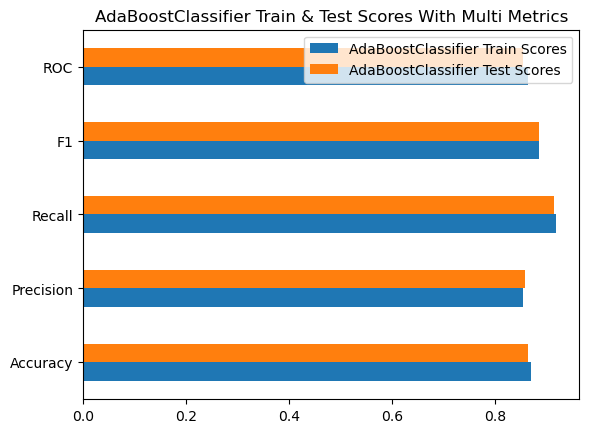

In [60]:
# AdaBoostClassifier
np.random.seed(6)

ada_clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",AdaBoostClassifier(n_estimators=202,learning_rate=0.1))])

ada_grid={"pl_trans__pl__degree":[3]}

gr_ada_clf=GridSearchCV(ada_clf,ada_grid,verbose=1,scoring='recall_macro')

eval_it(gr_ada_clf,'AdaBoostClassifier')

,Accuracy,Precision,Recall,F1,ROC
XGBClassifier Train Scores,0.870572,0.857809,0.915423,0.885680,0.865844
XGBClassifier Test Scores,0.853261,0.855856,0.896226,0.875576,0.845549


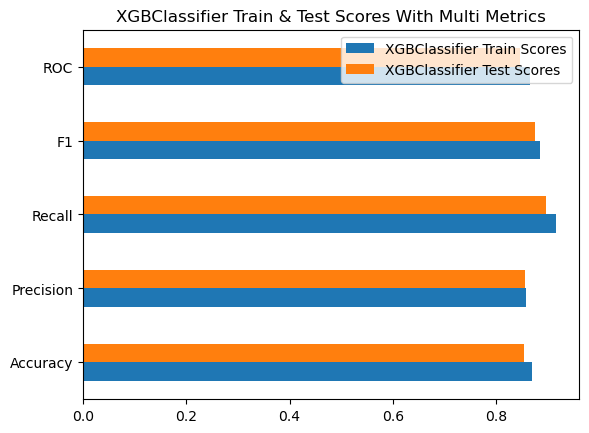

In [61]:
# XGBClassifier
np.random.seed(6)

xg_clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",XGBClassifier(use_label_encoder=False,max_depth=5,
                                                                                               learning_rate=0.045,gamma=0.7,
                                                                                               reg_lambda=8,scale_pos_weight=1))])
xgb_grid={"pl_trans__pl__degree":[4]}

gr_xg_clf=GridSearchCV(xg_clf,xgb_grid,verbose=0,scoring='recall_macro')

eval_it(gr_xg_clf,'XGBClassifier')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,Accuracy,Precision,Recall,F1,ROC
Logistic Regression Train Scores,0.870572,0.862884,0.907960,0.884848,0.866631
Logistic Regression Test Scores,0.847826,0.854545,0.886792,0.870370,0.840832


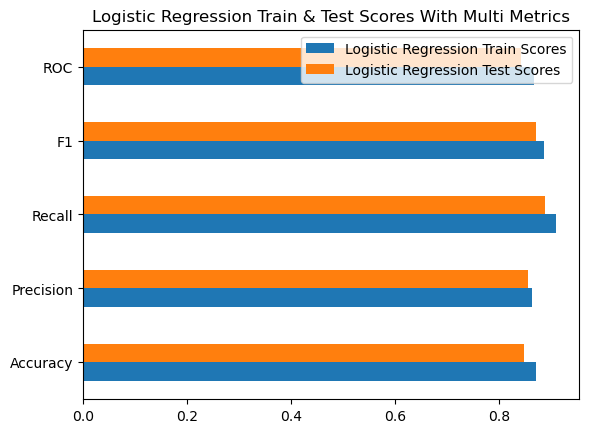

In [62]:
# LogisticRegression
np.random.seed(6)

lg_clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",LogisticRegression(max_iter=200,penalty='l2',
                                                                                                 C=0.24,solver='liblinear'))])
log_grid = {"pl_trans__pl__degree":[2]}

gr_lg_clf=GridSearchCV(lg_clf,log_grid,verbose=1,scoring='recall_macro')

eval_it(gr_lg_clf,'Logistic Regression')

# Best Classifier : AdaBoostClassifier

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,Accuracy,Precision,Recall,F1,ROC
AdaBoostClassifier Train Scores,0.86921,0.854167,0.917910,0.884892,0.864076
AdaBoostClassifier Test Scores,0.86413,0.858407,0.915094,0.885845,0.854983


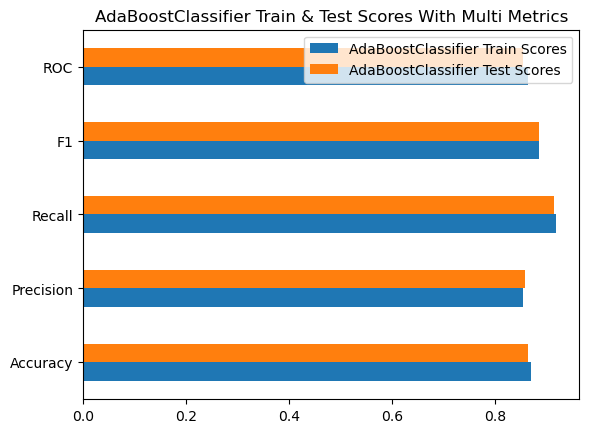

In [63]:
# AdaBoostClassifier
np.random.seed(6)

ada_clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",AdaBoostClassifier(n_estimators=202,learning_rate=0.1))])

ada_grid={"pl_trans__pl__degree":[3]}

gr_ada_clf=GridSearchCV(ada_clf,ada_grid,verbose=1,scoring='recall_macro')

eval_it(gr_ada_clf,'AdaBoostClassifier')